# RSS Step Size
This notebook will explore how step size affects gradient descent

test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array([1,2,3,4])
y = np.array([2,3,4,5])

Partial derivate for RSS is of the form $H^T(y-\hat{y})$

In [12]:
def get_partial(predicted_values, feature_matrix, weights):
    return np.dot(np.transpose(feature_matrix), predicted_values-np.dot(feature_matrix, weights))

In [4]:
# returns polynomial model for inputs based on degree and weight vector
# initialized to 0
def gen_predicted(x, deg):
    df = pd.DataFrame(x, columns=['x'])
    for i in range(deg):
        df['h'+str(i)] = df['x']**i
    return df.drop(['x'], axis=1).as_matrix(), np.zeros(deg)

In [17]:
a, weights = gen_predicted(x, 2)

to follow my notebook, weights will be [0, 1]

In [18]:
weights[1] = 1.

## Gradient Descent

We will use an abitrary tolerance of 0.2.  The step size will be fixed and tested across a range of different values

In [54]:
tolerance = 0.2
step = [0.01, 0.1, 0.25, 1]

In [38]:
def add_to_plot(weights, label, start=1, end=4, color=''):
    x_plot = np.arange(start, end, 0.1)
    y_plot = 0
    for index,val in enumerate(weights):
        y_plot += val*x_plot**index
    plt.plot(x_plot,y_plot,color, label=label)

For a single iteration

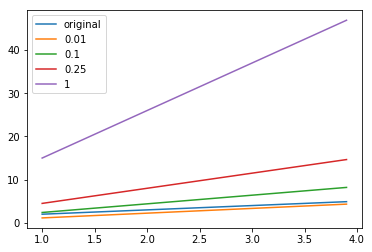

In [42]:
add_to_plot([1,1], 'original') # desired function
for s in step:
    next_weight = weights + s*get_partial(y, a, weights)
    add_to_plot(next_weight, str(s))
plt.legend()
plt.show()

After 20 iterations

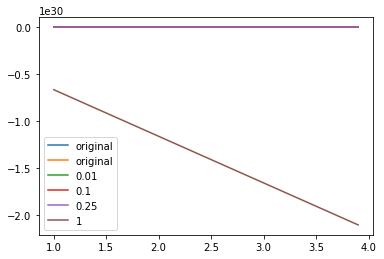

In [45]:
add_to_plot([1,1], 'original') # desired function
for s in step:
    temp_weights = weights
    for i in range(20):
        temp_weights = temp_weights + s*get_partial(y, a, temp_weights)
    add_to_plot(temp_weights, str(s))
plt.legend()
plt.show()

Clearly, we have a problem with convergence. It appears that if the learning rate is too high, gradient descent will diverge.  Plot the time till convergence based on a range of values to find the best learning rate.

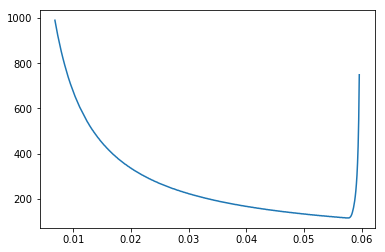

In [115]:
step = np.arange(0.0001, 0.07, 0.0001)
x_step = []
y_iteration = []
for s in step:
    temp_weights = weights
    for i in range(1000):
        partial = get_partial(y,a,temp_weights)
        temp_weights = temp_weights + s*partial
        if (np.linalg.norm(partial)<0.01):
            x_step.append(s)
            y_iteration.append(i)
            break
plt.plot(x_step, y_iteration)
plt.show()

In [116]:
pd.Series(y_iteration, index=x_step).idxmin()

0.057200000000000008